# Tanya Ortega 

## MADS 509 

## Assignment 2




# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


In [2]:
import sys
!{sys.executable} -m pip install --quiet emoji nltk pandas numpy
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tanya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [4]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [9]:
from pathlib import Path

# M1 Results folder
DATA = Path(r"C:\Users\tanya\Downloads\M1 Assignment Data\M1 Results")

TWITTER_DIR = DATA / "twitter"
LYRICS_DIR  = DATA / "lyrics"

print("DATA exists?   ", DATA.exists())
print("TWITTER exists?", TWITTER_DIR.exists())
print("LYRICS exists? ", LYRICS_DIR.exists())
print("\nTop-level in DATA:", [p.name for p in DATA.iterdir() if p.is_dir()])
print("Sample lyric files:", list(LYRICS_DIR.glob("**/*.txt"))[:5])

DATA exists?    True
TWITTER exists? True
LYRICS exists?  True

Top-level in DATA: ['lyrics', 'twitter']
Sample lyric files: [WindowsPath('C:/Users/tanya/Downloads/M1 Assignment Data/M1 Results/lyrics/cher/cher_88degrees.txt'), WindowsPath('C:/Users/tanya/Downloads/M1 Assignment Data/M1 Results/lyrics/cher/cher_adifferentkindoflovesong.txt'), WindowsPath('C:/Users/tanya/Downloads/M1 Assignment Data/M1 Results/lyrics/cher/cher_afterall.txt'), WindowsPath('C:/Users/tanya/Downloads/M1 Assignment Data/M1 Results/lyrics/cher/cher_again.txt'), WindowsPath('C:/Users/tanya/Downloads/M1 Assignment Data/M1 Results/lyrics/cher/cher_alfie.txt')]


In [ ]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = 0
    num_unique_tokens = 0
    lexical_diversity = 0.0
    num_characters = 0
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [10]:
from collections import Counter

def descriptive_stats(tokens, num_tokens=5, verbose=True):
    """
    Given a list of tokens, print number of tokens, number of unique tokens,
    number of characters, lexical diversity (type–token ratio),
    and the num_tokens most common tokens. 
    Return [num_tokens, num_unique_tokens, lexical_diversity, num_characters].
    """
    # core stats
    n_tokens = len(tokens)
    n_unique_tokens = len(set(tokens))
    lexical_diversity = (n_unique_tokens / n_tokens) if n_tokens else 0.0
    num_characters = sum(len(t) for t in tokens)

    if verbose:
        print(f"There are {n_tokens} tokens in the data.")
        print(f"There are {n_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
        # top-k most common tokens
        top = Counter(tokens).most_common(num_tokens)
        if top:
            print(f"\nTop {num_tokens} tokens:")
            for tok, cnt in top:
                print(f"  {tok}: {cnt}")

    return [n_tokens, n_unique_tokens, lexical_diversity, num_characters]

In [11]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)

There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.

Top 5 tokens:
  text: 3
  here: 2
  example: 2
  is: 1
  some: 1


Q: Why is it beneficial to use assertion statements in your code? 

A: Assertion statements are beneficial in code because they automatically stop the program if something isn't what you expect, so the mistakes show up right away instead of errors appearing later. Overall, this makes bugs easier to find. 

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [12]:
# Read in the lyrics data
from pathlib import Path

lyrics_dict = {}

for artist_dir in LYRICS_DIR.iterdir():
    if not artist_dir.is_dir():
        continue
    artist = artist_dir.name
    lyrics_dict[artist] = {}
    for fp in sorted(artist_dir.glob("*.txt")):
        txt = fp.read_text(encoding="utf-8", errors="ignore")
        lines = txt.splitlines()
        title = lines[0].strip() if lines else fp.stem
        body  = "\n".join(lines[2:]) if len(lines) > 2 else txt
        lyrics_dict[artist][title] = body

# check
for a, songs in lyrics_dict.items():
    print(f"{a}: {len(songs)} songs | sample titles: {list(songs.keys())[:3]}")

cher: 313 songs | sample titles: ['"88 Degrees"', '"A Different Kind Of Love Song"', '"After All"']
robyn: 93 songs | sample titles: ['"88 Days"', '"Ain\'t No Thing"', '"Anytime You Like"']


In [16]:
# Read in the twitter data
import pandas as pd
import re

twitter_desc = {}

for csv_path in sorted(TWITTER_DIR.glob("*.csv")):
    # infer artist from filename (e.g., "cher_followers.csv" -> "cher")
    artist = re.sub(r'_?followers.*$', '', csv_path.stem, flags=re.I)

    df = pd.read_csv(csv_path, low_memory=False)
    # find the description column
    desc_col = next((c for c in ["description", "bio", "user_description"] if c in df.columns), None)
    if desc_col is None:
        print(f"WARNING: No description column in {csv_path.name}. Columns: {df.columns[:8].tolist()}")
        continue

    descs = (
        df[desc_col]
        .dropna()
        .astype(str)
        .str.strip()
    )
    twitter_desc.setdefault(artist, []).extend([d for d in descs if d])

# check
for a, lst in twitter_desc.items():
    print(f"{a}: {len(lst)} descriptions | sample: {lst[:3]}")

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [17]:
punctuation = set(punctuation) # speeds up comparison

In [18]:
# clean twitter data 
from nltk.corpus import stopwords
sw = set(stopwords.words("english"))

def clean_and_tokenize(text):

    toks = []
    for w in text.split():
        w = w.lower()
        w = "".join(ch for ch in w if ch not in punctuation) 
        if w and w not in sw:
            toks.append(w)
    return toks

# Flatten all descriptions per artist
twitter_clean = {
    artist: [t for desc in descs for t in clean_and_tokenize(desc)]
    for artist, descs in twitter_desc.items()
}

# check
for a, toks in twitter_clean.items():
    print(f"{a}: {len(toks)} tokens | sample: {toks[:10]}")

In [19]:
# clean lyrics
lyrics_clean = {
    artist: [t for text in songs.values() for t in clean_and_tokenize(text)]
    for artist, songs in lyrics_dict.items()
}

# quick check
for a, toks in lyrics_clean.items():
    print(f"{a}: {len(toks)} tokens | sample: {toks[:10]}")

cher: 34901 tokens | sample: ['stuck', 'la', 'aint', 'got', 'friends', 'hollywood', 'nuts', 'many', 'dead', 'ends']
robyn: 13019 tokens | sample: ['light', 'candle', 'morning', 'signify', 'still', 'mind', 'darkness', 'arrived', 'without', 'warning']


## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [20]:
# calls to descriptive_stats 
for corpus_name, corpus in [("TWITTER", twitter_clean), ("LYRICS", lyrics_clean)]:
    for artist in sorted(corpus.keys()):
        print(f"\n=== {corpus_name} — {artist} ===")
        descriptive_stats(corpus[artist], num_tokens=10, verbose=True)


=== LYRICS — cher ===
There are 34901 tokens in the data.
There are 3682 unique tokens in the data.
There are 167578 characters in the data.
The lexical diversity is 0.105 in the data.

Top 10 tokens:
  love: 917
  im: 510
  know: 473
  dont: 428
  youre: 331
  baby: 314
  time: 313
  see: 306
  oh: 296
  one: 275

=== LYRICS — robyn ===
There are 13019 tokens in the data.
There are 2139 unique tokens in the data.
There are 62674 characters in the data.
The lexical diversity is 0.164 in the data.

Top 10 tokens:
  im: 255
  dont: 252
  love: 238
  know: 237
  got: 230
  baby: 211
  like: 203
  never: 143
  youre: 142
  get: 130


Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: 

The list would be mostly little filler words like the, and, to, I, you. They’d crowd out the meaningful words, and both artists’ lists would look more alike and less useful.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: 

Yes. I thought Robyn might use a wider range of words, and the numbers support this (Robyn's TTR ≈ is approximately 0.164 vs. Cher's approximately ≈ 0.105). Some of that gap is due to Cher having a significantly higher total number of words, but overall, it aligns with my expectations.


## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [39]:
!pip install emoji
import emoji

In [53]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions?

In [57]:
from pathlib import Path
import re

twitter_desc = {}

for fp in sorted(TWITTER_DIR.glob("*.txt")):
    artist = re.sub(r"_followers.*$", "", fp.stem)  
    descs = []
    with fp.open(encoding="utf-8", errors="ignore") as f:
        # read header and find the 'description' column index
        header = next(f).rstrip("\n").split("\t")
        header_lc = [h.lower() for h in header]
        try:
            desc_idx = header_lc.index("description")  
        except ValueError:
            desc_idx = 6 

        # collect descriptions
        for line in f:
            parts = line.rstrip("\n").split("\t")
            if len(parts) > desc_idx:
                d = parts[desc_idx].strip()
                if d:
                    descs.append(d)

    twitter_desc[artist] = descs

# check
for artist, descs in twitter_desc.items():
    print(f"{artist}: {len(descs)} descriptions")
    print("Sample:", descs[:3])

cher: 2001090 descriptions
Sample: ['𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜', '163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡', 'csu']
robynkonichiwa: 190033 descriptions
Sample: ['"I love chill" •Facebook / Instagram / SoundCloud: AngelxoArts• https://t.co/447okKLKzA…', "books, movies, music, nature & TV shows. OG Sweetee since '12 thanks to YouTube recommending 'This Feeling' on my homepage ♥️", '(Am)auteur en herbe 🌱 - juriste en paille 🤡 - Ami des fleurs 🌸🌈 (sans la main verte) - music & books - #morecomingsoon... (si on en voit le bout)']


In [58]:
import emoji
from collections import Counter

def extract_emojis(text):
    return [ch for ch in text if emoji.is_emoji(ch)]

emoji_counts = {}
for artist, descs in twitter_desc.items():
    all_emojis = []
    for d in descs:
        all_emojis.extend(extract_emojis(d))
    emoji_counts[artist] = Counter(all_emojis).most_common(10)

for artist, top_emojis in emoji_counts.items():
    print(f"\n=== {artist} ===")
    if top_emojis:
        for emo, cnt in top_emojis:
            print(f"{emo}: {cnt}")
    else:
        print("No emojis found.")


=== cher ===
❤: 79223
🌈: 47549
♥: 33978
🏳: 33412
✨: 29468
💙: 21379
🏻: 20930
🌊: 20223
✌: 16773
💜: 16550

=== robynkonichiwa ===
❤: 4783
🌈: 4685
🏳: 3528
♥: 3103
✨: 2223
🏻: 1495
✌: 1189
🏼: 1139
♀: 836
💙: 809


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [59]:
import re
from collections import Counter

def extract_hashtags(text):
    # standard hashtag pattern; keeps unicode letters/numbers/underscores
    return re.findall(r"#\w+", text, flags=re.UNICODE)

hashtag_counts = {}
for artist, descs in twitter_desc.items():
    all_tags = []
    for d in descs:
        all_tags.extend(extract_hashtags(d.lower()))
    hashtag_counts[artist] = Counter(all_tags).most_common(10)

for artist, top_tags in hashtag_counts.items():
    print(f"\n=== {artist} — top 10 hashtags ===")
    if top_tags:
        for tag, cnt in top_tags:
            print(f"{tag}: {cnt}")
    else:
        print("No hashtags found.")


=== cher — top 10 hashtags ===
#resist: 11657
#blm: 10466
#blacklivesmatter: 8154
#theresistance: 3508
#fbr: 3419
#resistance: 3061
#1: 2627
#voteblue: 2304
#lgbtq: 2074
#music: 1602

=== robynkonichiwa — top 10 hashtags ===
#blacklivesmatter: 601
#blm: 362
#music: 306
#1: 199
#teamfollowback: 135
#edm: 111
#lgbtq: 89
#resist: 86
#travel: 73
#art: 72


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [31]:
from collections import Counter

def title_tokens(title: str):
    # lowercase and remove punctuation (uses your `punctuation` set from earlier)
    clean = "".join(ch.lower() if ch not in punctuation else " " for ch in title)
    return [t for t in clean.split() if t]

title_top5 = {}
for artist, songs in lyrics_dict.items():
    c = Counter()
    for t in songs.keys():
        c.update(title_tokens(t))
    title_top5[artist] = pd.DataFrame(c.most_common(5), columns=["word","count"])
    print(f"\n{artist} — top 5 title words")
    display(title_top5[artist])


cher — top 5 title words


,word,count
0,the,54
1,you,44
2,i,38
3,love,36
4,a,28



robyn — top 5 title words


,word,count
0,you,9
1,me,9
2,the,7
3,my,6
4,love,5


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


In [68]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# tokenizer
collapse_whitespace = re.compile(r"\s+")

def tokenize_lyrics(text: str):
    return [w.lower() for w in collapse_whitespace.split(text) if w]

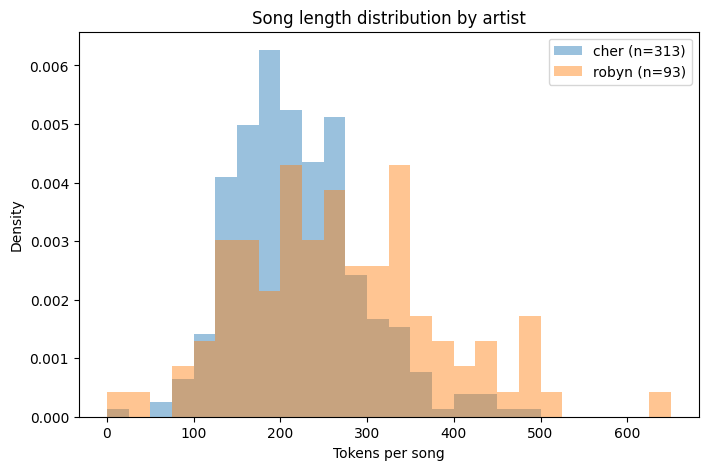

In [79]:
import numpy as np
bins = np.arange(0, df_lengths["length"].max()+25, 25)   # common bins

plt.figure(figsize=(8,5))
for artist, group in df_lengths.groupby("artist"):
    n = len(group)
    group["length"].plot(kind="hist", bins=bins, alpha=0.45, density=True, label=f"{artist} (n={n})")

plt.xlabel("Tokens per song")
plt.ylabel("Density")
plt.title("Song length distribution by artist")
plt.legend()
plt.show()

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: 

\s+ just means “one or more whitespace.” So any chunk of spaces, tabs, or line breaks gets treated as a single split point.

In [80]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

In [81]:
# Your lyric length comparison chart here. 
rows = []
for artist, songs in lyrics_dict.items():         
    for title, body in songs.items():
        tokens = tokenize_lyrics(body)             
        rows.append({"artist": artist, "title": title, "length": len(tokens)})

df_lengths = pd.DataFrame(rows)
print(df_lengths.head())
print(df_lengths.groupby("artist")["length"].describe())

  artist                            title  length
0   cher                     "88 Degrees"     325
1   cher  "A Different Kind Of Love Song"     257
2   cher                      "After All"     291
3   cher                          "Again"      79
4   cher                          "Alfie"     134
        count        mean         std   min    25%    50%    75%    max
artist                                                                 
cher    313.0  219.092652   73.461055  21.0  169.0  209.0  260.0  481.0
robyn    93.0  269.913978  114.648106  18.0  186.0  253.0  343.0  633.0
